# Planar Classification
<h4>- Neural Network Mindset -</h3>

### 1. Packages 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import pwd
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, load_planar_dataset

### 2. Neural Network One Hidden Layer

In [3]:
class OneNN:
    def __init__(self, n_x, n_n, n_y):
        ''' 
        n_x: num of dimensions of X
        n_n: num of norons of the first hidden layer
        n_y: num of norons output layer
        '''
        self.X = None
        self.y = None
        self.N = 0
        
        self.w1 = np.random.rand(n_n, n_x) * 0.01
        self.w2 = np.random.rand(n_y, n_n) * 0.01
        self.b1 = np.zeros((n_n, 1))
        self.b2 = np.zeros((n_y, 1))
        
        self.cost = None
    # --------- Helper function ---------#
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    @staticmethod
    def tanh(z):
        return ((np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z)))
    # --------- Main function ---------#
    def forward_propagation(self, X):
        z1 = self.w1 @ X + self.b1
        A1 = self.tanh(z1)
        z2 = self.w2 @ A1 + self.b2
        A2 = self.sigmoid(z2)
        
        cache = {"z1": z1, "A1": A1, "z2": z2, "A2": A2}
        return A2, cache
        
    def compute_cost(self, A2, y):
        N = self.N
        cost = (-1 / N) * np.sum(np.multiply(y, np.log(A2 + 1e-8)) + np.multiply((1 - y), np.log(1 - A2 + 1e-8)))
        cost = float(np.squeeze(cost))
        return cost
    
    def backward_propagation(self, cache, X, y):
        '''
        cache: result from forward propagate
        '''
        N = self.N
        w1, w2 = self.w1, self.w2
        A1, A2 = cache["A1"], cache["A2"]
        
        dz2 = A2 - y
        dw2 = (1/N) * (dz2 @ A1.T)
        db2 = (1/N) * np.sum(dz2, axis=1, keepdims=True)
        
        dz1 = (w2.T @ dz2) * (1 - A1 ** 2)
        dw1 = (1/N) * (dz1 @ X.T)
        db1 = (1/N) * np.sum(dz1, axis=1, keepdims=True)
        
        grads = {
            "dw1": dw1,
            "dw2": dw2,
            "db1": db1,
            "db2": db2,
        }
        return grads
    
    def predict(self, X, threshold=0.5):
        A2, cache = self.forward_propagation(X)
        predictions = (A2 > threshold)
        return predictions
    
    def score(self, X, y):
        predictions = self.predict(X)
        accuracy = 100 * np.sum(y == predictions) / y.shape[1]
        return accuracy
        
    def fit(self, X, y, schedule='step', lr=1e-3, decay_rate=0.9, epochs=1000, step_size=100, progress=False):
        np.random.seed(3)
        self.X = X
        self.y = y
        self.N = X.shape[1]
        
        costs = []
        for epoch in range(epochs):
            A2, cache = self.forward_propagation(X)
            cost = self.compute_cost(A2, y)
            grads = self.backward_propagation(cache, X, y)
            
            dw1 = grads["dw1"]
            db1 = grads["db1"]
            dw2 = grads["dw2"]
            db2 = grads["db2"]
            
            self.w1 -= lr * dw1
            self.b1 -= lr * db1
            self.w2 -= lr * dw2
            self.b2 -= lr * db2
            
            costs.append(cost)
            # if epoch > 1 and np.abs(costs[-1] - costs[-2]) < 1e-4:
            #     print(f"Converged at epoch {epoch}")
            #     break
            if schedule == 'step' and epoch % step_size == 0:
                lr *= decay_rate
            elif schedule == 'exponential':
                lr = lr * np.exp(-decay_rate * epoch)
            elif schedule == 'time-based':
                lr = lr / (1 + decay_rate * epoch)
                
        if progress:
            plt.plot(costs)
            plt.xlabel("Epochs")
            plt.ylabel("Cost")
            plt.title("Training Cost Over Time")
            plt.show()    
        parameters = {
            "W1": self.w1,
            "b1": self.b1,
            "W2": self.w2,
            "b2": self.b2}
        return parameters

### 3. Load dataset

In [4]:
X, y = load_planar_dataset()

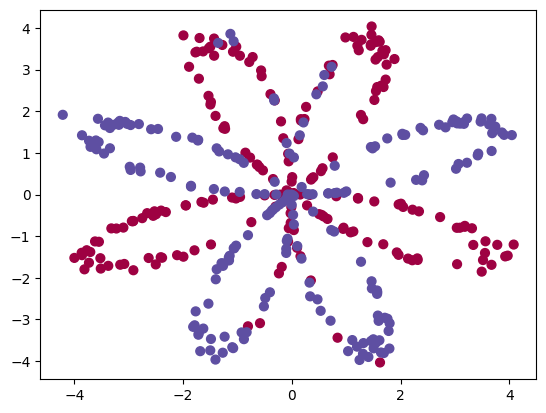

In [5]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=y, s=40, cmap=plt.cm.Spectral);

In [6]:
# X = X.T
# y = y.reshape(1, -1)
print(X.shape)
print(y.shape)

(2, 400)
(1, 400)


### Training model

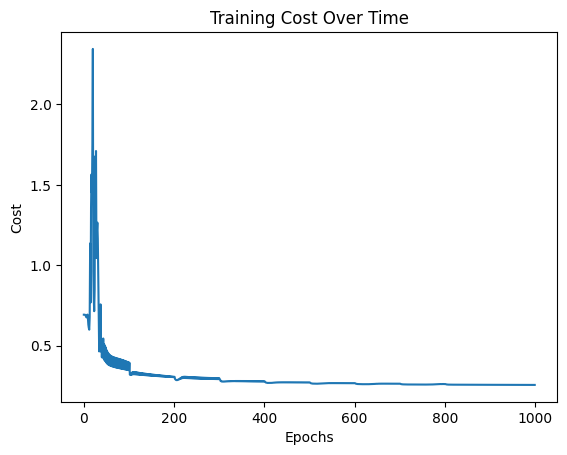

In [7]:
onn = OneNN(X.shape[0], 4, y.shape[0])
parameters = onn.fit(X, y, lr=10 ,progress=True)

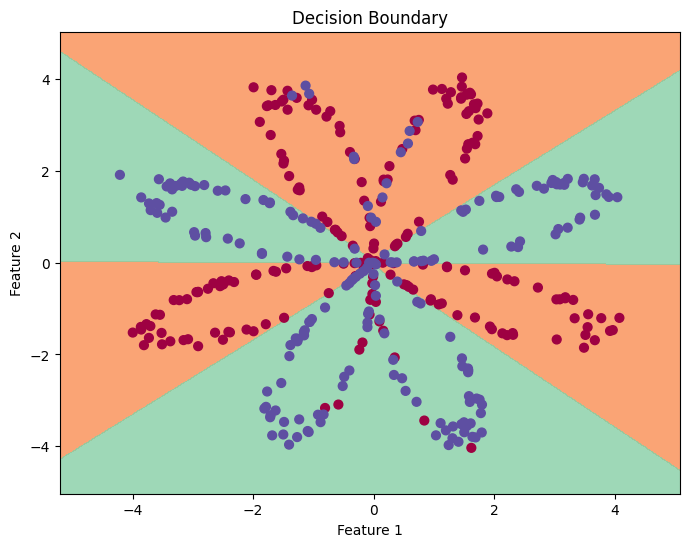

In [8]:
# Plot the decision boundary
plot_decision_boundary(lambda x: onn.predict(x.T), X, y)

In [9]:
accuracy = (np.dot(y, onn.predict(X).T) + np.dot(1 - y, 1 - onn.predict(X).T)) / float(y.size) * 100
print('Accuracy: %d%%' % accuracy.item())

Accuracy: 91%
